<a href="https://colab.research.google.com/github/ikki02/Python/blob/master/DataScience/web_optimization_ml/2_%E7%A2%BA%E7%8E%87%E7%9A%84%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install arviz==0.9.0 pymc3==3.9.3 matplotlib==3.2.1
!pip install arviz
!pip install -U pymc3

     |████████████████████████████████| 1.5MB 13.2MB/s 
     |████████████████████████████████| 4.3MB 47.1MB/s 
     |████████████████████████████████| 727kB 50.7MB/s 
     |████████████████████████████████| 296kB 43.1MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1
     |████████████████████████████████| 1.9MB 12.5MB/s 
     |████████████████████████████████| 102kB 11.4MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=4b05c863fd0363e98a0eb3daab59141d93c7b9d6f72c2d5a7a6f7cd23176e97f
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pymc3 as pm

In [3]:
# まずはこれまで見てきたデザインAとBのクリック率θの事後分布の推論をPyMC3を用いて実装し直してみる
N = 40
a = 2
with pm.Model() as model:
    theta = pm.Uniform('theta', lower=0, upper=1) # 0~1のθに関する一様分布
    #theta = pm.Beta('theta', alpha=1, beta=1) # ベータ分布で上記一様分布を実装する場合
    obs = pm.Binomial('a', p=theta, n=N, observed=a)
    trace = pm.sample(5000, chains=2) # 推論開始。chainsは並行して一連のサンプリングを行う回数。ここでは5000*2の10000個のサンプルを得る。

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 7 seconds.


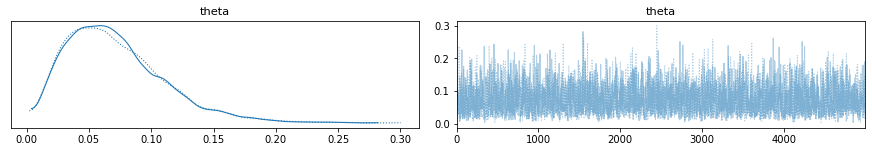

In [4]:
with model:
  pm.traceplot(trace)

In [5]:
with model:
  print(pm.summary(trace, hdi_prob=0.95))

        mean     sd  hdi_2.5%  hdi_97.5%  ...  ess_sd  ess_bulk  ess_tail  r_hat
theta  0.071  0.039     0.008       0.15  ...  4416.0    3765.0    4132.0    1.0

[1 rows x 11 columns]
